In [1]:
import pandas as pd

csv_path = "/Users/test/Desktop/phishing-detector/data/interim/features_v3_dataset.csv"
df = pd.read_csv(csv_path)

feature_list = [
    "domain_complexity",
    "domain_whitelist",
    "trusted_token_context",
    "host_entropy",
    "infra_risk",
    "brand_in_path",
    "brand_match_flag",
]

# Columna signals_on: cuántas de las features están por encima de 0
signals_mask = df[feature_list] > 0
df["signals_on"] = signals_mask.sum(axis=1)

# Distribución de signals_on
signals_dist = df["signals_on"].value_counts().sort_index()

# Subsets solicitados
urls_signals_0 = df.loc[df["signals_on"] == 0, ["url", "signals_on"]].head(10)
urls_signals_1 = df.loc[df["signals_on"] == 1, ["url", "signals_on"]].head(10)
urls_signals_6_7 = df.loc[df["signals_on"].isin([6, 7]), ["url", "signals_on"]].head(10)

signals_dist, urls_signals_0, urls_signals_1, urls_signals_6_7


(signals_on
 1     75
 2     94
 3    251
 4     72
 Name: count, dtype: int64,
 Empty DataFrame
 Columns: [url, signals_on]
 Index: [],
                                                   url  signals_on
 2                      https://www.wizink.es/tarjetas           1
 3                              https://www.wizink.es/           1
 4         https://www.cetelem.es/credito-y-prestamos/           1
 5                             https://www.cetelem.es/           1
 6   https://www.cajamar.es/es/particulares/product...           1
 8             https://www.cajamar.es/es/particulares/           1
 14          https://www.abanca.com/es/banca-personal/           1
 34  https://www.abanca.com/es/banca-a-distancia/ba...           1
 35                https://www.abanca.com/es/empresas/           1
 78  https://www.mapfre.es/particulares/contacto/da...           1,
 Empty DataFrame
 Columns: [url, signals_on]
 Index: [])

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar dataset
csv_path = "/Users/test/Desktop/phishing-detector/data/interim/features_v3_dataset.csv"
df = pd.read_csv(csv_path)

# Mapear label a texto
label_map = {0: "legit", 1: "phish"}
df["label_name"] = df["label"].map(label_map)

# Definir lista de features numéricas (excluye columnas de label/url)
feature_cols = [c for c in df.columns if c not in ["label", "url", "label_name"]]

df.head()


,domain_complexity,domain_whitelist,trusted_token_context,host_entropy,infra_risk,brand_in_path,brand_match_flag,label,url,label_name
0,0.000000,1.0,1.0,-0.0,0.0,0.0,1.0,0,https://www.caixabank.es/particular/banca-digi...,legit
1,0.000000,1.0,1.0,-0.0,0.0,0.0,1.0,0,https://www.ibercaja.es/particulares/,legit
2,0.412932,0.0,-1.0,-0.0,0.0,0.0,0.0,0,https://www.wizink.es/tarjetas,legit
3,0.412932,0.0,-1.0,-0.0,0.0,0.0,0.0,0,https://www.wizink.es/,legit
4,0.726262,0.0,-1.0,-0.0,0.0,0.0,0.0,0,https://www.cetelem.es/credito-y-prestamos/,legit


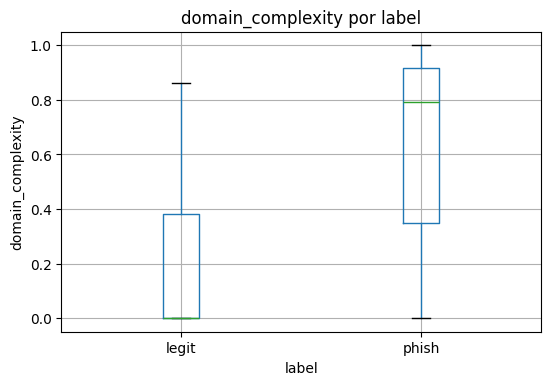

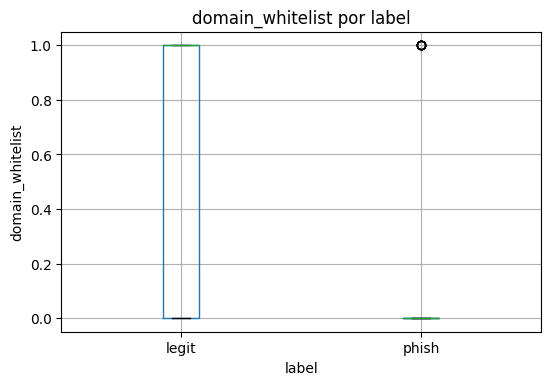

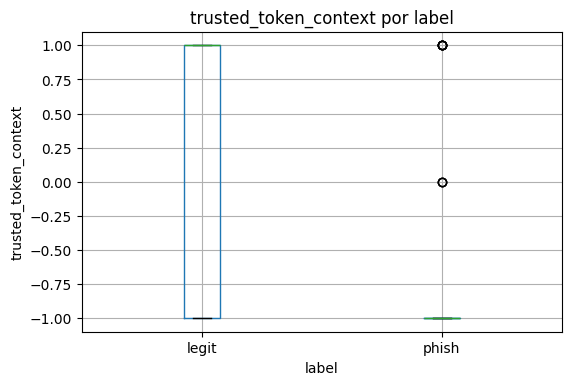

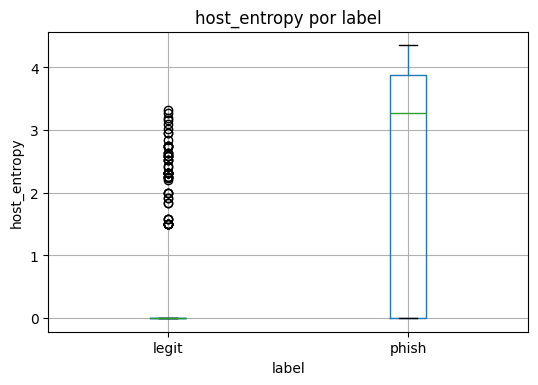

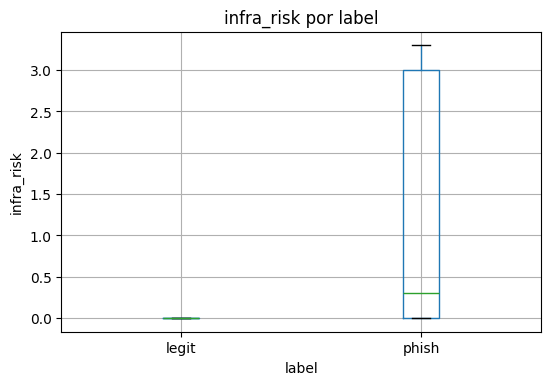

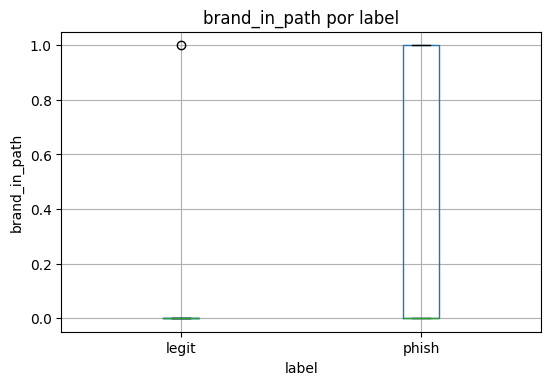

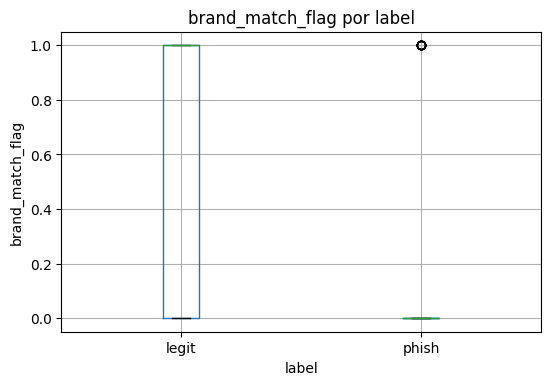

In [3]:
# Boxplots por feature separados por label
for feature in feature_cols:
    fig, ax = plt.subplots(figsize=(6, 4))
    df.boxplot(column=feature, by="label_name", ax=ax)
    ax.set_title(f"{feature} por label")
    ax.set_xlabel("label")
    ax.set_ylabel(feature)
    plt.suptitle("")  # limpiar título automático
    plt.show()



In [4]:
# Media de cada feature por label
mean_by_label = df.groupby("label_name")[feature_cols].mean()
mean_by_label


,domain_complexity,domain_whitelist,trusted_token_context,host_entropy,infra_risk,brand_in_path,brand_match_flag
label_name,,,,,,,
legit,0.180118,0.713115,0.442623,0.541622,0.000000,0.004098,0.729508
phish,0.646698,0.024194,-0.939516,2.536607,1.208468,0.258065,0.036290


In [5]:
# 20 URLs con valores más extremos combinados de host_entropy e infra_risk
extreme_cols = ["url", "host_entropy", "infra_risk", "label_name"]
scored = df[extreme_cols].copy()
scored["extreme_score"] = scored[["host_entropy", "infra_risk"]].abs().sum(axis=1)
extreme_urls = scored.sort_values(by="extreme_score", ascending=False).head(20)
extreme_urls.drop(columns=["extreme_score"]).reset_index(drop=True)



,url,host_entropy,infra_risk,label_name
0,http://correos.es-es-es-herramientas-localizad...,4.290695,3.3,phish
1,http://loc10cxixaayuodaaccesoae-b40361.ingress...,4.224118,3.3,phish
2,https://caixbk-b947df.ingress-comporellon.ewp....,4.288910,3.0,phish
3,https://particularhomeweblogicsession-b1032f.i...,4.261468,3.0,phish
4,http://empresasone-b96935.ingress-comporellon....,3.935956,3.3,phish
5,https://seguridad-gestion-b1032f.ingress-compo...,4.222208,3.0,phish
6,https://track2022-bf075e.ingress-daribow.ewp.l...,4.195816,3.0,phish
7,https://servicioelportal-particulare-bc8925.in...,4.185979,3.0,phish
8,https://particulares-es-b965d0.ingress-compore...,4.180365,3.0,phish
9,https://gestin-particulares-es-1-bc3294.ingres...,4.176297,3.0,phish


In [6]:
df.groupby("label_name")["domain_complexity"].describe()


,count,mean,std,min,25%,50%,75%,max
label_name,,,,,,,,
legit,244.0,0.180118,0.302270,0.0,0.000000,0.000000,0.380149,0.861426
phish,248.0,0.646698,0.283358,0.0,0.349774,0.790927,0.915738,1.000000


In [7]:
df.groupby("label_name")["trusted_token_context"].describe()


,count,mean,std,min,25%,50%,75%,max
label_name,,,,,,,,
legit,244.0,0.442623,0.889344,-1.0,-1.0,1.0,1.0,1.0
phish,248.0,-0.939516,0.325021,-1.0,-1.0,-1.0,-1.0,1.0


In [8]:
df.groupby("label_name")["host_entropy"].describe()


,count,mean,std,min,25%,50%,75%,max
label_name,,,,,,,,
legit,244.0,0.541622,1.014570,-0.0,-0.0,-0.000000,0.000000,3.327820
phish,248.0,2.536607,1.624116,-0.0,0.0,3.264621,3.873337,4.351837


In [9]:
df.groupby("label_name")["infra_risk"].describe()


,count,mean,std,min,25%,50%,75%,max
label_name,,,,,,,,
legit,244.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
phish,248.0,1.208468,1.400596,0.0,0.0,0.3,3.0,3.3


In [10]:
df.groupby("label_name")["brand_in_path"].describe()


,count,mean,std,min,25%,50%,75%,max
label_name,,,,,,,,
legit,244.0,0.004098,0.064018,0.0,0.0,0.0,0.0,1.0
phish,248.0,0.258065,0.438455,0.0,0.0,0.0,1.0,1.0


In [11]:
df.groupby("label_name")["brand_match_flag"].describe()


,count,mean,std,min,25%,50%,75%,max
label_name,,,,,,,,
legit,244.0,0.729508,0.445127,0.0,0.0,1.0,1.0,1.0
phish,248.0,0.036290,0.187390,0.0,0.0,0.0,0.0,1.0


In [12]:
df[["domain_complexity","domain_whitelist","trusted_token_context",
     "host_entropy","infra_risk","brand_in_path","brand_match_flag"]].corr()


,domain_complexity,domain_whitelist,trusted_token_context,host_entropy,infra_risk,brand_in_path,brand_match_flag
domain_complexity,1.000000,-0.843501,-0.838338,0.246365,-0.006445,0.238473,-0.820658
domain_whitelist,-0.843501,1.000000,0.992422,-0.499009,-0.397137,-0.296348,0.970036
trusted_token_context,-0.838338,0.992422,1.000000,-0.496177,-0.405824,-0.296969,0.992539
host_entropy,0.246365,-0.499009,-0.496177,1.000000,0.635581,0.243264,-0.485934
infra_risk,-0.006445,-0.397137,-0.405824,0.635581,1.000000,0.244394,-0.408365
brand_in_path,0.238473,-0.296348,-0.296969,0.243264,0.244394,1.000000,-0.293136
brand_match_flag,-0.820658,0.970036,0.992539,-0.485934,-0.408365,-0.293136,1.000000


In [14]:
# Lista de features v3 (ajusta si tu variable se llama diferente)
feature_list = [
    "domain_complexity",
    "domain_whitelist",
    "trusted_token_context",
    "host_entropy",
    "infra_risk",
    "brand_in_path",
    "brand_match_flag",
]

# Crear columna signals_on (cuenta features > 0)
df["signals_on"] = df[feature_list].gt(0).sum(axis=1)


In [17]:
# URLs phishing con exactamente 1 señal activa
phish_one_signal = df[(df["label"] == 1) & (df["signals_on"] == 1)]
phish_one_signal[["url", "signals_on"] + feature_list].head(30)



,url,signals_on,domain_complexity,domain_whitelist,trusted_token_context,host_entropy,infra_risk,brand_in_path,brand_match_flag
249,https://wififpt.com.vn/es/bankia.es/es/acceso-...,1,0.775643,0.0,-1.0,0.0,0.0,0.0,0.0
376,https://appcanaldigital.com/,1,0.902811,0.0,-1.0,0.0,0.0,0.0,0.0
377,https://clientepresenteado.digital/inicio,1,0.942503,0.0,-1.0,0.0,0.0,0.0,0.0
380,https://banco-galicia-online.com/galicia/confirm,1,0.931306,0.0,-1.0,0.0,0.0,0.0,0.0
385,https://www.seguridadsabadell.com,1,0.927282,0.0,-1.0,-0.0,0.0,0.0,0.0
388,https://facturapostpago.com/,1,0.929055,0.0,-1.0,0.0,0.0,0.0,0.0
396,https://w.aviso-cliente.net,1,0.946109,0.0,-1.0,-0.0,0.0,0.0,0.0
398,https://l.ead.me/modifica-tu-entrega,1,0.338512,0.0,-1.0,-0.0,0.0,0.0,0.0
399,https://kmctayurvedacollege.org/ingresoseguro/,1,0.986591,0.0,-1.0,0.0,0.0,0.0,0.0
405,https://l.ead.me/BBVA24,1,0.338512,0.0,-1.0,-0.0,0.0,0.0,0.0


In [18]:
df[df["signals_on"]==1].groupby("label_name")[feature_list].mean()


,domain_complexity,domain_whitelist,trusted_token_context,host_entropy,infra_risk,brand_in_path,brand_match_flag
label_name,,,,,,,
legit,0.590396,0.0,-1.0,0.0,0.0,0.0,0.0
phish,0.860028,0.0,-1.0,0.0,0.0,0.0,0.0


In [19]:
df[df["signals_on"]==1]["label_name"].value_counts()


label_name
legit    43
phish    32
Name: count, dtype: int64

In [20]:
df[df["signals_on"]==1].groupby("label_name")["domain_complexity"].describe()


,count,mean,std,min,25%,50%,75%,max
label_name,,,,,,,,
legit,43.0,0.590396,0.189717,0.338512,0.399919,0.675588,0.744201,0.861426
phish,32.0,0.860028,0.183924,0.338512,0.862952,0.924719,0.952672,1.000000


In [21]:
df[(df["signals_on"]==1) & (df["label_name"]=="legit") & (df["domain_complexity"]>0.86)][["url","domain_complexity"]]


,url,domain_complexity
134,https://www.coinbase.com/es/learn,0.861426
204,https://www.coinbase.com/es-es,0.861426


In [22]:
df[(df["signals_on"]==1) & (df["label_name"]=="phish") & (df["domain_complexity"]<0.75)][["url","domain_complexity"]]


,url,domain_complexity
398,https://l.ead.me/modifica-tu-entrega,0.338512
405,https://l.ead.me/BBVA24,0.338512
479,https://dgtt48.lat/yyjxzpjg/e2Walj/7,0.744201
490,https://l.ead.me/DGTspain,0.338512


In [23]:
two_signals = df[df["signals_on"] == 2]

two_signals.groupby("label_name")[feature_list].mean()


,domain_complexity,domain_whitelist,trusted_token_context,host_entropy,infra_risk,brand_in_path,brand_match_flag
label_name,,,,,,,
legit,0.693840,0.0,-0.956522,2.282791,0.000000,0.00000,0.043478
phish,0.865774,0.0,-1.000000,2.047795,0.147887,0.15493,0.000000


In [25]:
df[(df["signals_on"]==2) & (df["label_name"]=="legit")][["url"] + feature_list].head(15)


,url,domain_complexity,domain_whitelist,trusted_token_context,host_entropy,infra_risk,brand_in_path,brand_match_flag
41,https://www.bbva.com/es/,0.341770,0.0,0.0,-0.000000,0.0,0.0,1.0
95,https://help.twitter.com/es,0.734953,0.0,-1.0,2.000000,0.0,0.0,0.0
112,https://academy.bit2me.com/es/,0.790927,0.0,-1.0,2.521641,0.0,0.0,0.0
114,https://wwwapps.ups.com/pickup/pending?loc=es_ES,0.344181,0.0,-1.0,1.842371,0.0,0.0,0.0
118,https://mygls.gls-spain.es/,0.854735,0.0,-1.0,2.321928,0.0,0.0,0.0
130,https://support.kraken.com/hc/es,0.744201,0.0,-1.0,2.521641,0.0,0.0,0.0
133,https://status.coinbase.com/,0.861426,0.0,-1.0,1.918296,0.0,0.0,0.0
135,https://accounts.coinbase.com/signin?lang=es,0.861426,0.0,-1.0,2.750000,0.0,0.0,0.0
136,https://developers.binance.com/docs/wallet/oth...,0.790410,0.0,-1.0,2.846439,0.0,0.0,0.0
141,https://accounts.binance.com/es/register,0.790410,0.0,-1.0,2.750000,0.0,0.0,0.0


In [26]:
df[(df["signals_on"]==2) & (df["label_name"]=="phish")][["url"] + feature_list].head(20)


,url,domain_complexity,domain_whitelist,trusted_token_context,host_entropy,infra_risk,brand_in_path,brand_match_flag
244,https://caixabank-es-883f1e.ingress-erytho.eas...,0.790927,0.0,-1.0,4.127283,0.0,0.0,0.0
246,http://wingerdgastehuis.co.za/Bienvenido%20a%2...,0.965648,0.0,-1.0,0.000000,0.3,0.0,0.0
248,https://www.mobile.kinman.com/.well-known/acme...,0.744201,0.0,-1.0,2.641604,0.0,0.0,0.0
250,https://web-5.builderallwppro.com/necorreos/vv...,0.944930,0.0,-1.0,2.321928,0.0,0.0,0.0
259,https://personal-santanders-pago-movil-es-app-...,0.866645,0.0,-1.0,3.855853,0.0,0.0,0.0
260,https://bancosantander-es-online.preview-domai...,0.968159,0.0,-1.0,3.454987,0.0,0.0,0.0
263,https://particulares-bancosantander-es.preview...,0.968159,0.0,-1.0,3.685918,0.0,0.0,0.0
264,https://particulares-bancosantander-es-beyogal...,0.866645,0.0,-1.0,4.351837,0.0,0.0,0.0
265,https://particulares-bancosantander.codeanyapp...,0.866645,0.0,-1.0,3.676391,0.0,0.0,0.0
267,https://loikolaka-1.builderallwppro.com/correo...,0.944930,0.0,-1.0,2.732159,0.0,0.0,0.0


In [27]:
two = df[df["signals_on"]==2]

two.groupby("label_name")[["domain_complexity","host_entropy"]].describe()


domain_complexity                                          \
                       count      mean       std       min       25%   
label_name                                                             
legit                   23.0  0.693840  0.196582  0.341770  0.557494   
phish                   71.0  0.865774  0.133484  0.338512  0.853044   

                                         host_entropy                      \
                 50%       75%       max        count      mean       std   
label_name                                                                  
legit       0.790410  0.841887  0.861426         23.0  2.282791  0.686623   
phish       0.901868  0.932475  1.000000         71.0  2.047795  1.609494   

                                                   
            min  25%       50%      75%       max  
label_name                                         
legit      -0.0  2.0  2.321928  2.75000  3.327820  
phish      -0.0  0.0  2.913977  3.28743  4.351837

In [28]:
conflict = df[
    (df["domain_complexity"].between(0.80, 0.90)) &
    (df["signals_on"].isin([1,2]))
]

conflict[["url","label_name","domain_complexity","signals_on"]].head(30)


,url,label_name,domain_complexity,signals_on
118,https://mygls.gls-spain.es/,legit,0.854735,2
133,https://status.coinbase.com/,legit,0.861426,2
134,https://www.coinbase.com/es/learn,legit,0.861426,1
135,https://accounts.coinbase.com/signin?lang=es,legit,0.861426,2
145,https://help.ovhcloud.com/csm/es-es/faq-suppor...,legit,0.829040,2
204,https://www.coinbase.com/es-es,legit,0.861426,1
208,https://ing.ingdirect.es/pfm/#login,legit,0.854735,2
209,https://help.coinbase.com/es-es,legit,0.861426,2
223,https://yosoymas.masmovil.es/login/primer-acceso,legit,0.821173,2
233,https://www.portalcliente.mercadona.es/,legit,0.854735,2


In [29]:
df[df["signals_on"]==3].groupby("label_name")[feature_list].mean()


,domain_complexity,domain_whitelist,trusted_token_context,host_entropy,infra_risk,brand_in_path,brand_match_flag
label_name,,,,,,,
legit,0.017711,0.972789,0.965986,0.052312,0.000000,0.006803,0.993197
phish,0.516429,0.009615,-0.971154,3.348122,1.984615,0.173077,0.019231


In [30]:
df[df["signals_on"]==4].groupby("label_name")[feature_list].mean()



,domain_complexity,domain_whitelist,trusted_token_context,host_entropy,infra_risk,brand_in_path,brand_match_flag
label_name,,,,,,,
legit,0.000000,1.000000,1.000000,2.321343,0.000000,0.000000,1.000000
phish,0.431259,0.121951,-0.707317,3.304398,2.019512,0.853659,0.170732


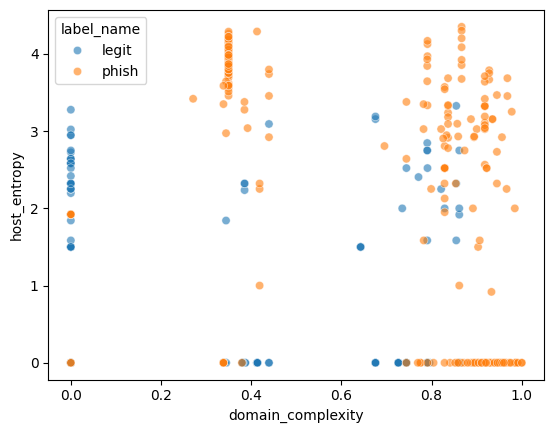

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=df,
    x="domain_complexity",
    y="host_entropy",
    hue="label_name",
    alpha=0.6
)
plt.show()
